# Proyecto R - Diabetes
***
- Autor: Juan Antonio García Cuevas
- Fecha: 03/07/2016
***

**Con el conjunto de datos diabetes.data dplyr**:

## - Cargar las librerías

In [35]:
library(ggplot2)
library(dplyr)
library(plyr)

## - Cargar los datos en R.

In [36]:
## Carga los datos del fichero
data <- read.table("diabetes.data", header=T)

## Muestra información (primeras filas, nº de filas y columnas, variables ...)
head(data)
str(data)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,59,F,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,M,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,F,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,M,25.3,84,198,131.4,40,5,4.8903,89,206
5,50,M,23,101,192,125.4,52,4,4.2905,80,135
6,23,M,22.6,89,139,64.8,61,2,4.1897,68,97


'data.frame':	442 obs. of  11 variables:
 $ AGE: int  59 48 72 24 50 23 36 66 60 29 ...
 $ SEX: Factor w/ 2 levels "F","M": 1 2 1 2 2 2 1 1 1 2 ...
 $ BMI: num  32.1 21.6 30.5 25.3 23 22.6 22 26.2 32.1 30 ...
 $ BP : num  101 87 93 84 101 89 90 114 83 85 ...
 $ S1 : int  157 183 156 198 192 139 160 255 179 180 ...
 $ S2 : num  93.2 103.2 93.6 131.4 125.4 ...
 $ S3 : num  38 70 41 40 52 61 50 56 42 43 ...
 $ S4 : num  4 3 4 5 4 2 3 4.55 4 4 ...
 $ S5 : num  4.86 3.89 4.67 4.89 4.29 ...
 $ S6 : int  87 69 85 89 80 68 82 92 94 88 ...
 $ Y  : int  151 75 141 206 135 97 138 63 110 310 ...


## - Eliminar los missing values, que están codificados como -9999.00.

In [37]:
# Muestra algunas filas en las que pueden verse algunos valores -9999.00 
print("Antes:")
data[c(18 : 20), 1 : ncol(data)]
dim(data)

# Reemplaza los valores -9999.00 por NA 
data[data == -9999 ] <- NA

# Muestra las filas anteriores después de la modificación
print("Después:")
data[c(18 : 20), 1 : ncol(data)]

# Elimina las filas con valores NA y muestra información del nuevo dataframe resultante
data <- na.omit(data)
print("Dimensiones del nuevo dataframe sin filas con valores NA:")
dim(data)

[1] "Antes:"


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
18,68,F,27.5,111,214,147,39,5,4.9416,91,144
19,38,M,25.4,84,162,103,42,4,-9999,87,97
20,41,M,24.7,83,187,108.2,60,3,4.5433,78,168


[1] 442  11

[1] "Después:"


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
18,68,F,27.5,111,214,147,39,5,4.9416,91,144
19,38,M,25.4,84,162,103,42,4,NA,87,97
20,41,M,24.7,83,187,108.2,60,3,4.5433,78,168


[1] "Dimensiones del nuevo dataframe sin filas con valores NA:"


[1] 433  11

## - Ver el tipo de cada una de las variables.

In [38]:
str(data)

'data.frame':	433 obs. of  11 variables:
 $ AGE: int  59 48 72 24 50 23 36 66 60 29 ...
 $ SEX: Factor w/ 2 levels "F","M": 1 2 1 2 2 2 1 1 1 2 ...
 $ BMI: num  32.1 21.6 30.5 25.3 23 22.6 22 26.2 32.1 30 ...
 $ BP : num  101 87 93 84 101 89 90 114 83 85 ...
 $ S1 : int  157 183 156 198 192 139 160 255 179 180 ...
 $ S2 : num  93.2 103.2 93.6 131.4 125.4 ...
 $ S3 : num  38 70 41 40 52 61 50 56 42 43 ...
 $ S4 : num  4 3 4 5 4 2 3 4.55 4 4 ...
 $ S5 : num  4.86 3.89 4.67 4.89 4.29 ...
 $ S6 : int  87 69 85 89 80 68 82 92 94 88 ...
 $ Y  : int  151 75 141 206 135 97 138 63 110 310 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:9] 19 25 74 86 342 384 421 433 440
  .. ..- attr(*, "names")= chr [1:9] "19" "25" "74" "86" ...


## - Realizar un análisis estadı́stico de las variables: calcular la media, varianza, rangos, etc. ¿Tienen las distintas variables rangos muy diferentes?.

In [39]:
summary(data)
print("Desviación típica:")
apply(data[-2], 2, sd)
print("Varianza:")
apply(data[-2], 2, var)

      AGE        SEX          BMI              BP               S1       
 Min.   :19.00   F:203   Min.   :18.00   Min.   : 62.00   Min.   : 97.0  
 1st Qu.:38.00   M:230   1st Qu.:23.10   1st Qu.: 84.00   1st Qu.:164.0  
 Median :50.00           Median :25.70   Median : 93.00   Median :186.0  
 Mean   :48.48           Mean   :26.35   Mean   : 94.65   Mean   :189.3  
 3rd Qu.:59.00           3rd Qu.:29.20   3rd Qu.:105.00   3rd Qu.:210.0  
 Max.   :79.00           Max.   :42.20   Max.   :133.00   Max.   :301.0  
       S2              S3              S4              S5       
 Min.   : 41.6   Min.   :22.00   Min.   :2.000   Min.   :3.258  
 1st Qu.: 95.4   1st Qu.:40.00   1st Qu.:3.000   1st Qu.:4.277  
 Median :113.0   Median :48.00   Median :4.000   Median :4.635  
 Mean   :115.4   Mean   :49.86   Mean   :4.071   Mean   :4.645  
 3rd Qu.:134.2   3rd Qu.:58.00   3rd Qu.:5.000   3rd Qu.:4.997  
 Max.   :242.4   Max.   :99.00   Max.   :9.090   Max.   :6.107  
       S6               Y  

[1] "Desviación típica:"


AGE        BMI         BP         S1         S2         S3         S4 
13.1712365  4.4282031 13.9364285 34.7892967 30.6081829 13.0367488  1.2998030 
        S5         S6          Y 
 0.5251244 11.4739099 77.5470653

[1] "Varianza:"


AGE          BMI           BP           S1           S2           S3 
 173.4814708   19.6089824  194.2240393 1210.2951629  936.8608596  169.9568204 
          S4           S5           S6            Y 
   1.6894878    0.2757557  131.6506073 6013.5473441

Las variables muestran rangos de valores muy dispares. Destacan, por un lado, las variables S4 y S5 como las de menor rango y valores menores. Por otro lado, la variable Y es la que presenta mayor amplitud de rango.

## - Hacer un gráfico de cajas (boxplot) dónde se pueda ver la información anterior de forma gráfica.

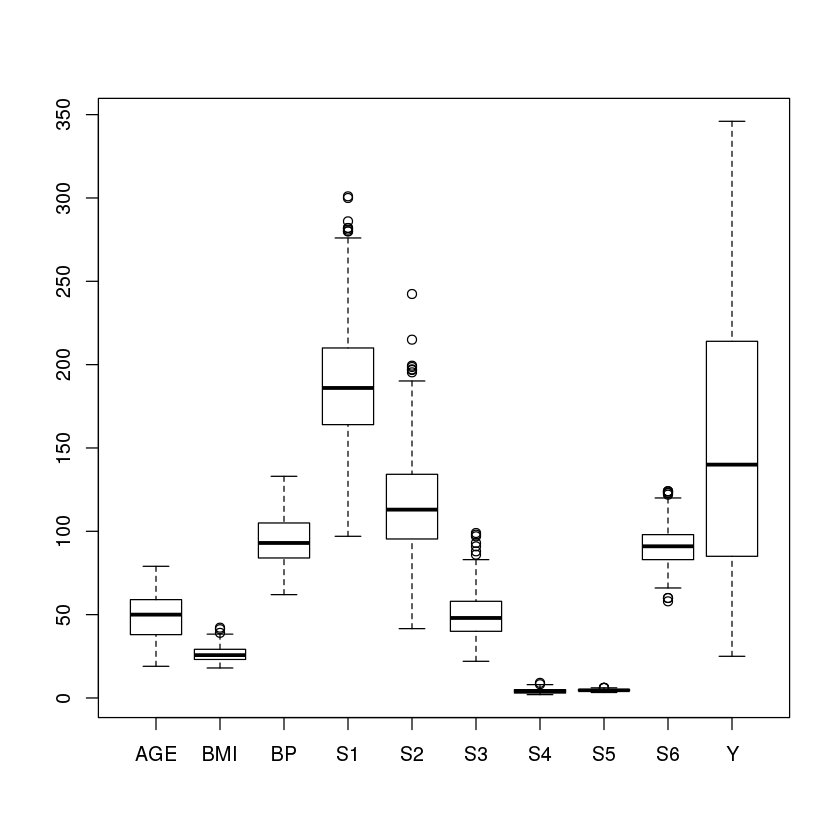

In [40]:
boxplot(data[-2])

## - Calcular la media para las filas que tienen SEX=M y la media para las filas que tienen SEX=F, utilizando la función tapply.

In [41]:
# Calcula la media para cada variable mumérica
datax = data[-2]
for (i in 1:ncol(datax)) {
    print(colnames(datax[i]))
    print(tapply(datax[[i]], data$SEX, mean))
}

[1] "AGE"
       F        M 
50.86700 46.36522 
[1] "BMI"
       F        M 
26.80099 25.95609 
[1] "BP"
       F        M 
98.17562 91.53474 
[1] "S1"
       F        M 
190.6552 188.0304 
[1] "S2"
       F        M 
120.1103 111.1726 
[1] "S3"
       F        M 
44.54187 54.56304 
[1] "S4"
       F        M 
4.537882 3.658217 
[1] "S5"
       F        M 
4.731533 4.569392 
[1] "S6"
       F        M 
93.86207 88.94348 
[1] "Y"
       F        M 
155.8079 149.0391 


## - Calcular la correlación de todas las variables numéricas con la variable Y.

In [42]:
correlacionY <- cor(data[-2])[,ncol(data[-2])]
head(correlacionY, ncol(data[-2]))

AGE        BMI         BP         S1         S2         S3         S4 
 0.1889540  0.5863673  0.4398515  0.2133325  0.1747189 -0.3963076  0.4325640 
        S5         S6          Y 
 0.5703164  0.3892246  1.0000000

La variable BMI tiene la máxima correlación con Y, y la variable S2 la mínima.

## - Realizar un gráfico de dispersión para las variables que tienen más y menos correlación con Y y comentar los resultados. ¿Como serı́a el gráfico de dispersión entre dos cosas con correlación 1?.


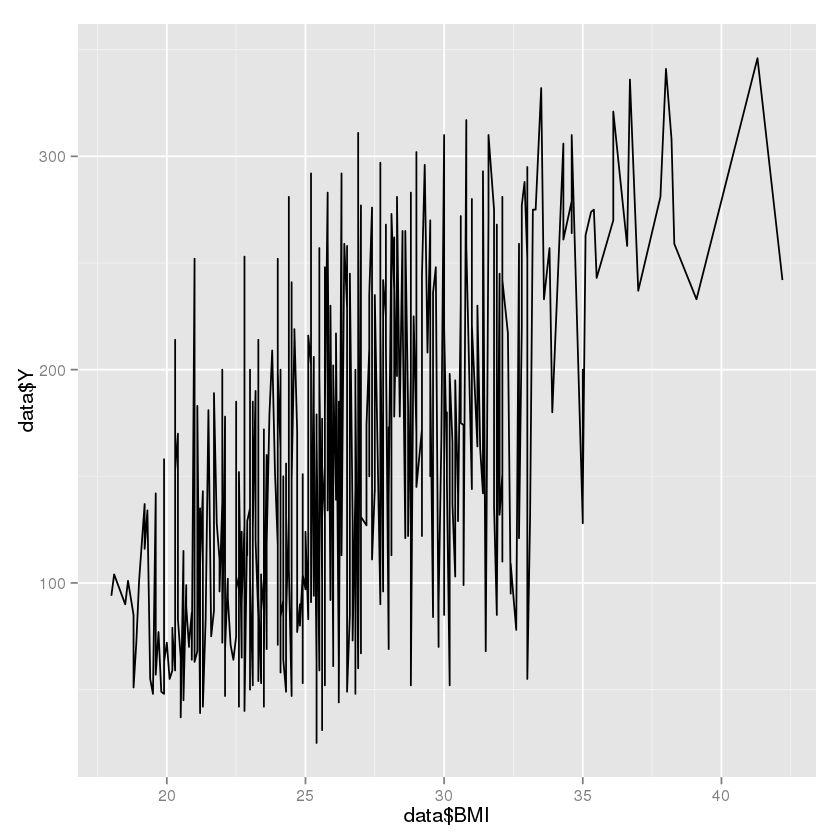

In [43]:
ggplot(data, aes(x=data$BMI, y=data$Y)) + geom_line()

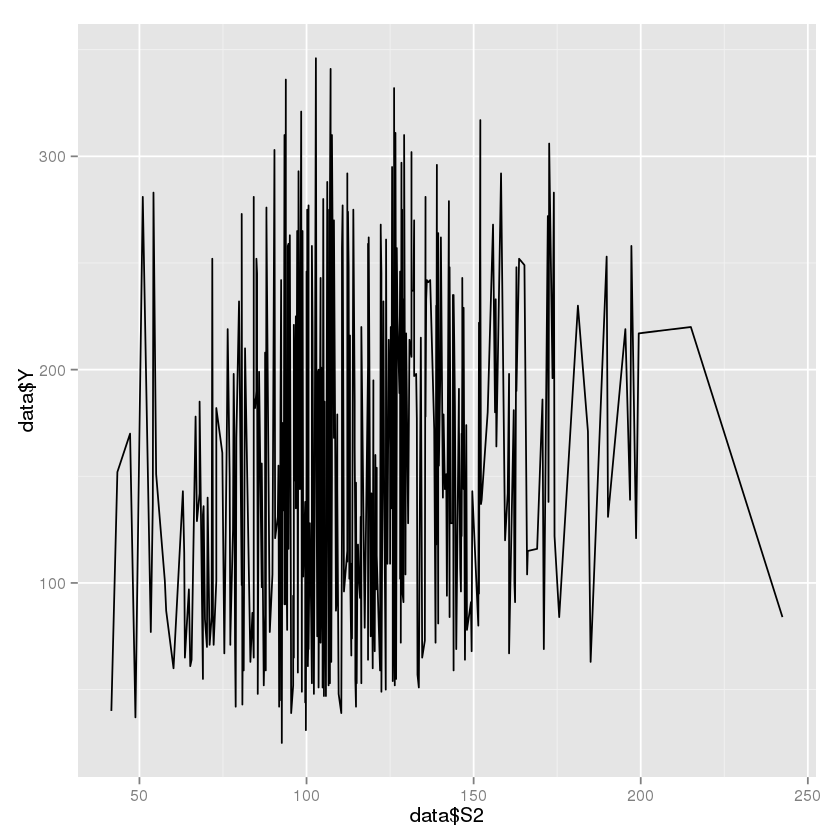

In [44]:
ggplot(data, aes(x=data$S2, y=data$Y)) + geom_line()

El gráfico de dispersión entre dos variables de correlación 1 es una línea recta de 45%. Por ejemplo el gráfico de dispersión entre la variable Y con sigo misma:

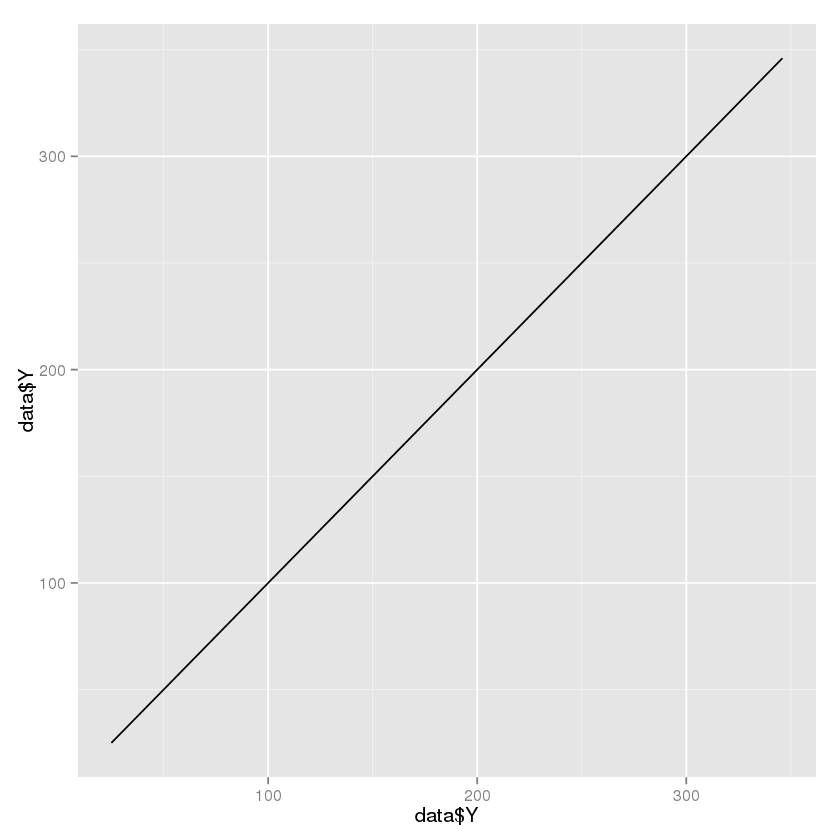

In [45]:
ggplot(data, aes(x=data$Y, y=data$Y)) + geom_line()

## - Transformar la variable SEX, que es un factor, en una variable numérica utilizando, por ejemplo, la codificación M=1 y F=2.

In [46]:
# Muestra el valor de la variable SEX antes de la modificación
print("Antes:")
head(data$SEX, 10)
class(data$SEX)

# Modifica los valores de la variable SEX
data$SEX<-as.character(data$SEX)
data$SEX<-replace(data$SEX, data$SEX=="M","1")
data$SEX<-replace(data$SEX, data$SEX=="F","2")
data$SEX <- as.numeric(data$SEX)

# Muestra el valor de la variable SEX después de la modificación
print("Después:")
head(data$SEX, 10)
class(data$SEX)
head(data)

[1] "Antes:"


[1] F M F M M M F F F M
Levels: F M

[1] "factor"

[1] "Después:"


[1] 2 1 2 1 1 1 2 2 2 1

[1] "numeric"

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,59,2,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,1,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,2,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,1,25.3,84,198,131.4,40,5,4.8903,89,206
5,50,1,23,101,192,125.4,52,4,4.2905,80,135
6,23,1,22.6,89,139,64.8,61,2,4.1897,68,97


## - Definimos los outliers como los elementos (filas) de los datos para los que cualquiera de las variables está por encima o por debajo de la mediana más/menos 3 veces el MAD (Median Absolute Deviation). Identificar estos outliers y quitarlos.

In [47]:
# Creamos una función que reemplace los outlier por NA
quitar_outliers <- function(x) {
  mediana <- median(x)
  desviacion <- mad(x)
  maximo <- mediana + 3 * desviacion
  minimo <- mediana - 3 * desviacion
  y <- x
  y[x < minimo] <- NA
  y[x > maximo] <- NA
  y
}

# Mostramos las dimensiones del dataframe antes de la modificación
print("Numero de filas antes:")
nrow(data)

# Cambiamos los outlier de las variables (excepto sexo y edad) por NA
for (i in 3:ncol(data)) {
  data[[i]] <- quitar_outliers(data[[i]])
}
# Eliminamos las líneas del dataframe con algún valor NA
data <- na.omit(data)

# Mostramos las dimensiones del dataframe después de la modificación
print("Numero de filas después:")
nrow(data)

[1] "Numero de filas antes:"


[1] 433

[1] "Numero de filas después:"


[1] 415

## - Separar el conjunto de datos en dos, el primero (entrenamiento) conteniendo un 70% de los datos y el segundo (test) un 30%, de forma aleatoria.

In [48]:
# Calculamos el número de filas correspondiente al 70%
corte70 <- floor(0.70 * nrow(data))
corte70

# Fijamos la semilla para generación de números aleatorios
set.seed(3)

# Generamos la lista de números aleatorios (70%)
aleatorios <- sample(seq_len(nrow(data)), size=corte70)
str(aleatorios)

# Generamos el dataframe de entrenamiento
entrenamiento <- data[aleatorios,]
str(entrenamiento)

# Generamos el dataframe de test
test <- data[-aleatorios,]
str(test)

[1] 290

 int [1:290] 70 335 159 136 248 411 51 121 236 257 ...
'data.frame':	290 obs. of  11 variables:
 $ AGE: int  52 25 49 57 52 45 46 34 60 59 ...
 $ SEX: num  2 2 2 2 1 1 1 1 1 2 ...
 $ BMI: num  26.6 22.6 31.9 30.7 23 24.2 24.9 20.6 23.4 27.2 ...
 $ BP : num  111 85 94 90 107 ...
 $ S1 : int  209 130 234 204 179 177 198 185 247 158 ...
 $ S2 : num  126 71 156 148 124 ...
 $ S3 : num  61 48 34 34 42.5 45 54 58 65 39 ...
 $ S4 : num  3 3 7 6 4.21 4 4 3 3.8 4 ...
 $ S5 : num  4.68 4.01 5.4 4.71 4.16 ...
 $ S6 : int  109 81 122 93 93 82 103 74 77 93 ...
 $ Y  : int  85 71 268 174 50 64 104 115 78 127 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:18] 23 57 114 120 138 158 227 253 257 258 ...
  .. ..- attr(*, "names")= chr [1:18] "24" "59" "118" "124" ...
'data.frame':	125 obs. of  11 variables:
 $ AGE: int  59 50 60 61 41 35 63 53 46 48 ...
 $ SEX: num  2 1 2 1 1 1 1 1 1 2 ...
 $ BMI: num  32.1 23 32.1 24 24.7 21.1 24.4 20.5 27.4 33 ...
 $ BP : num  101 101 83 91 83 82 73 78 78 123 .

## - Escalar los datos para que tengan media 0 y varianza 1, es decir, restar a cada variable numérica su media y dividir por la desviación tı́pica. Calcular la media y desviación en el conjunto de train, y utilizar esa misma media y desviación para escalar el conjunto de test.

In [49]:
# Crea una función para normalzar dataframes
normalizar_dataframe =  function(datos, parametros) {
    as.data.frame(
        Map(function(columna, parametros) {
            (columna - parametros[1]) / parametros[2]
        }, datos, parametros)
    )
}

# Obtiene la media y la desviación típica
media <- numcolwise(mean)(entrenamiento[-2])
desviacion <- numcolwise(sd)(entrenamiento[-2])
media
desviacion

# Normaliza los dataframe
parametros <- rbind(media, desviacion)
entrenamiento_norm <- normalizar_dataframe(entrenamiento[-2], parametros)
test_norm <- normalizar_dataframe(test[-2], parametros)
summary(entrenamiento_norm)
summary(test_norm)

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,48.53448,25.9769,94.45972,185.9931,112.8114,49.70172,3.984759,4.623143,91.21379,150.9621


,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,13.36112,4.054668,13.28631,32.41662,28.33212,12.4252,1.223236,0.5254454,10.99052,76.61589


      AGE               BMI                 BP                S1          
 Min.   :-2.2105   Min.   :-1.96734   Min.   :-2.4431   Min.   :-2.74529  
 1st Qu.:-0.6949   1st Qu.:-0.72802   1st Qu.:-0.7120   1st Qu.:-0.70159  
 Median : 0.1097   Median :-0.09295   Median :-0.1099   Median :-0.03064  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7084   3rd Qu.: 0.66543   3rd Qu.: 0.6428   3rd Qu.: 0.58633  
 Max.   : 2.2802   Max.   : 3.03924   Max.   : 2.9008   Max.   : 2.96166  
       S2                 S3                S4                 S5          
 Min.   :-2.51345   Min.   :-2.2295   Min.   :-1.62255   Min.   :-2.59788  
 1st Qu.:-0.65337   1st Qu.:-0.7808   1st Qu.:-0.80504   1st Qu.:-0.71300  
 Median :-0.07452   Median :-0.1370   Median : 0.01246   Median :-0.06298  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.56786   3rd Qu.: 0.6679   3rd Qu.: 0.82996   3rd Qu.: 0.71189  
 Max.   : 2.96443  

      AGE                BMI                 BP                 S1          
 Min.   :-2.21048   Min.   :-1.72071   Min.   :-2.19246   Min.   :-2.25172  
 1st Qu.:-0.86329   1st Qu.:-0.61088   1st Qu.:-0.86252   1st Qu.:-0.67845  
 Median : 0.10969   Median :-0.01896   Median :-0.10987   Median : 0.06191  
 Mean   :-0.00767   Mean   : 0.18880   Mean   : 0.02701   Mean   : 0.17346  
 3rd Qu.: 0.78328   3rd Qu.: 0.86890   3rd Qu.: 0.86858   3rd Qu.: 0.92566  
 Max.   : 1.98079   Max.   : 3.01458   Max.   : 2.37389   Max.   : 2.96166  
       S2                 S3                 S4                 S5          
 Min.   :-2.25932   Min.   :-1.74659   Min.   :-1.62255   Min.   :-2.14417  
 1st Qu.:-0.52278   1st Qu.:-0.61985   1st Qu.:-0.80504   1st Qu.:-0.60719  
 Median : 0.09137   Median :-0.13696   Median : 0.01246   Median : 0.02200  
 Mean   : 0.19528   Mean   :-0.03072   Mean   : 0.14241   Mean   : 0.05017  
 3rd Qu.: 0.93846   3rd Qu.: 0.50690   3rd Qu.: 0.82996   3rd Qu.: 0.59256  

## - (Opcional) Realizar un modelo de regresión lineal de la variable de respuesta sobre el resto y ajustarlo por mı́nimos cuadrados usando únicamente los datos del conjunto de entrenamiento.

In [50]:
regresion <- lm(Y~ ., data=entrenamiento)
summary(regresion)


Call:
lm(formula = Y ~ ., data = entrenamiento)

Residuals:
     Min       1Q   Median       3Q      Max 
-150.814  -40.160   -0.702   38.584  133.678 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -236.2874    89.9868  -2.626 0.009122 ** 
AGE            0.2315     0.2803   0.826 0.409642    
SEX          -25.5947     7.3715  -3.472 0.000598 ***
BMI            4.1570     1.0171   4.087 5.72e-05 ***
BP             1.0532     0.2984   3.530 0.000486 ***
S1            -0.3003     0.7689  -0.391 0.696418    
S2             0.1014     0.7048   0.144 0.885665    
S3            -0.8716     1.0753  -0.811 0.418306    
S4             4.0195     7.8092   0.515 0.607158    
S5            53.4959    19.6611   2.721 0.006920 ** 
S6             0.3357     0.3535   0.950 0.343058    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.15 on 279 degrees of freedom
Multiple R-squared:  0.4997,	Adjusted R-squared:  0.4818 
F

## - (Opcional) Calcular el error cuadrático medio de los datos del conjunto de entrenamiento y de los datos del conjunto de test, definido como (...ver documento de sesión 3...), donde y es el vector de respuesta de los datos y ŷ es el vector que predice el modelo (para los mismos datos).

In [51]:
vector_predictivo <- predict.lm(regresion, newdata=data)
error_cuadratico_medio <- mean((data$Y - vector_predictivo)^2)
cat("Error cuadrático medio:", error_cuadratico_medio, "\n")

Error cuadrático medio: 2963.389 
